In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import numpy as np

In [2]:
myData = pd.read_csv('.\\datasets\\Data.csv')
myData.head(2)

,X,y
0,0.011562,-0.435556
1,0.126902,0.991959


In [3]:
X = myData.iloc[:, 0:1].values
X

array([[0.01156173],
       [0.1269017 ],
       [0.40799266],
       [0.47853787],
       [0.52460608],
       [0.74062657],
       [0.90498954],
       [0.95900955],
       [1.04053036],
       [1.33638407],
       [1.42667198],
       [1.50012987],
       [2.01864464],
       [2.15630122],
       [2.44864451],
       [2.48180176],
       [2.58784674],
       [2.66917528],
       [2.80844126],
       [2.878187  ],
       [2.90822982],
       [2.9453425 ],
       [3.03948938],
       [3.05280152],
       [3.19051304],
       [3.20615825],
       [3.24758696],
       [3.28761198],
       [3.3121565 ],
       [3.78229829],
       [3.79670319],
       [3.81418961],
       [3.91577754],
       [4.19800501],
       [4.43766656],
       [4.73658247],
       [4.7563214 ],
       [4.76509583],
       [4.90161237],
       [4.9094606 ]])

In [4]:
y = myData.iloc[:, 1:2].values
y
#target variable can be inside 1D or 2D array, but independent can only be in
#array

array([[-0.43555628],
       [ 0.99195878],
       [ 0.91791912],
       [ 0.88766915],
       [ 0.86552131],
       [ 0.48199076],
       [ 0.61769381],
       [ 0.57433107],
       [ 0.5057628 ],
       [ 0.23227136],
       [ 0.39316594],
       [ 0.07060765],
       [-0.43302705],
       [-0.55262025],
       [-0.76936607],
       [ 0.2983436 ],
       [-0.85056061],
       [-0.89047089],
       [-0.94501646],
       [-0.96550885],
       [-0.79453848],
       [-0.98080466],
       [-0.99479199],
       [-0.99606066],
       [-0.99880364],
       [ 0.34270123],
       [-0.99438786],
       [-0.98935811],
       [-0.98548922],
       [-0.80167415],
       [ 0.12846622],
       [-0.78220635],
       [-0.71499115],
       [-0.49199863],
       [-0.27127978],
       [ 0.52634385],
       [ 0.04391828],
       [ 0.05268245],
       [ 0.1880962 ],
       [ 0.19579847]])

In [5]:
regr = DecisionTreeRegressor(max_depth=2)

In [6]:
regr.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [7]:
y_pred = regr.predict(X)

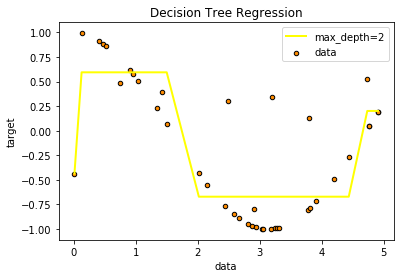

In [8]:
plt.figure()
plt.scatter(X, y, s=20, edgecolor = "black", c="darkorange", label="data")
plt.plot(X, y_pred, color="yellow", label="max_depth=2", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()
#Here becoz of lack of data points in some regions, some lines on model show as
#slanted lines, but we should only have either horizontal or vertical lines in
#model plot.(we can correct by giving large number of equally spaced input
#points using numpy)

In [9]:
regr = DecisionTreeRegressor(max_depth=3)

In [10]:
regr.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [11]:
y_pred = regr.predict(X)

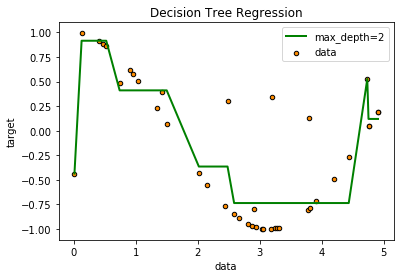

In [14]:
plt.figure()
plt.scatter(X, y, s=20, edgecolor = "black", c="darkorange", label="data")
plt.plot(X, y_pred, color="green", label="max_depth=2", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()
#Number of horizontal levels will show how many leafs are there in model

In [15]:
#Fit
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [16]:
#Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis] #equally spaced data points made into 2D array
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

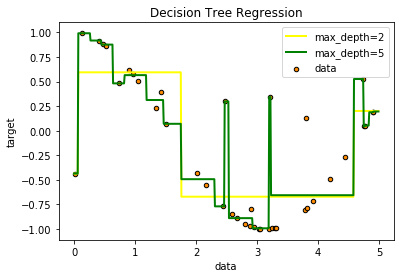

In [17]:
#plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="yellow",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="green", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()
#spikes in max_depth = 5 model show signs of overfitting
#We can even place constraint on no. of data points that should be there in a 
#leaf before further splits can be considered inside it.